<a href="https://colab.research.google.com/github/eshanth23/CS680/blob/main/Copy_of_CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

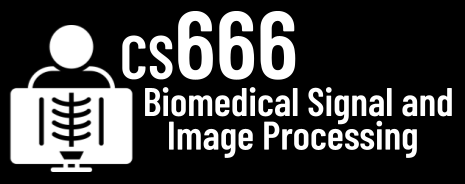

# Assignment 1

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (5 pts): Install the BioSPPY library with the following code.

In [6]:
!pip install biosppy

In [8]:
!pip install peakutils

**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset. Note: this might fail with an import error, but should be an easy fix :)

In [9]:
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [15]:
SAMPLING_RATE = metadata['sampling_rate']
SECONDS = len(signal) / SAMPLING_RATE
print("Sampling Rate:", SAMPLING_RATE, "Hz")
print("Duration:", SECONDS, "seconds")

Sampling Rate: 1000.0 Hz
Duration: 15.0 seconds


**Task 4** (15 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

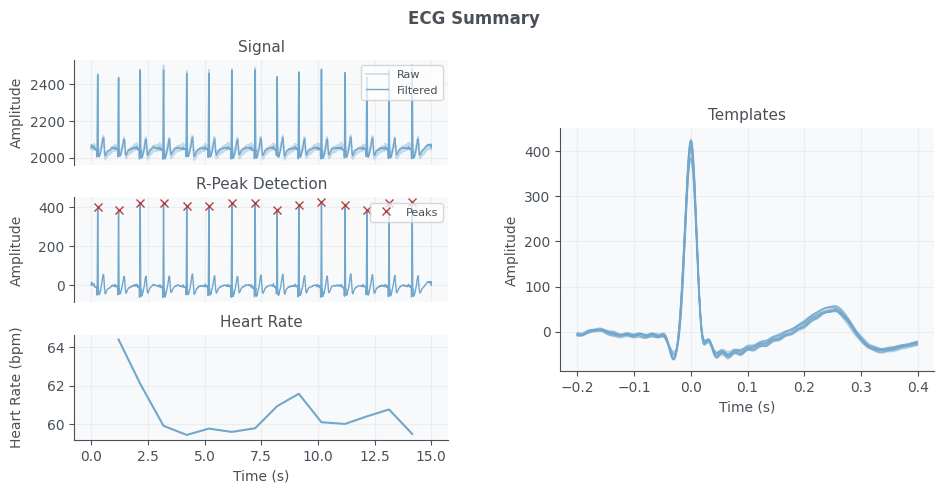

In [23]:
### TODO
from biosppy.signals import ecg

output = ecg.ecg(signal=signal,
                 sampling_rate=SAMPLING_RATE,
                 show=True)

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

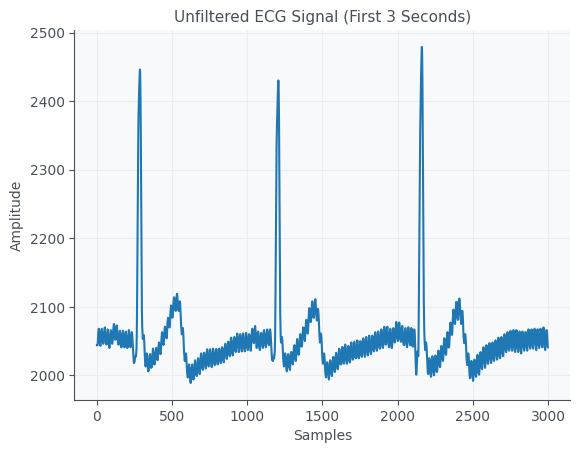

In [24]:
### TODO plot unfiltered signal
import matplotlib.pyplot as plt

samples_3sec = int(3 * SAMPLING_RATE)

plt.figure()
plt.plot(signal[:samples_3sec])
plt.title("Unfiltered ECG Signal (First 3 Seconds)")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()

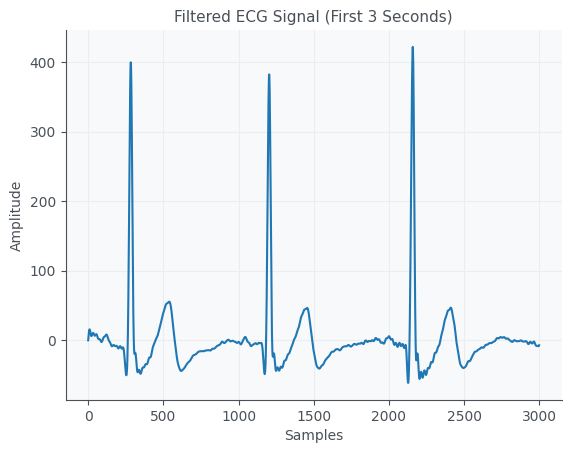

In [25]:
### TODO plot filtered signal
import matplotlib.pyplot as plt

samples_3sec = int(3 * SAMPLING_RATE)

output['filtered']

filtered_signal = output['filtered']

plt.figure()
plt.plot(filtered_signal[:samples_3sec])
plt.title("Filtered ECG Signal (First 3 Seconds)")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
"""
In the unfiltered signal, noise and baseline drift make it difficult to clearly identify ECG components.
In the filtered signal, the P wave, QRS complex (Q, R, S), and T wave are much more distinguishable.
The R peaks appear as sharp high-amplitude spikes.

"""

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

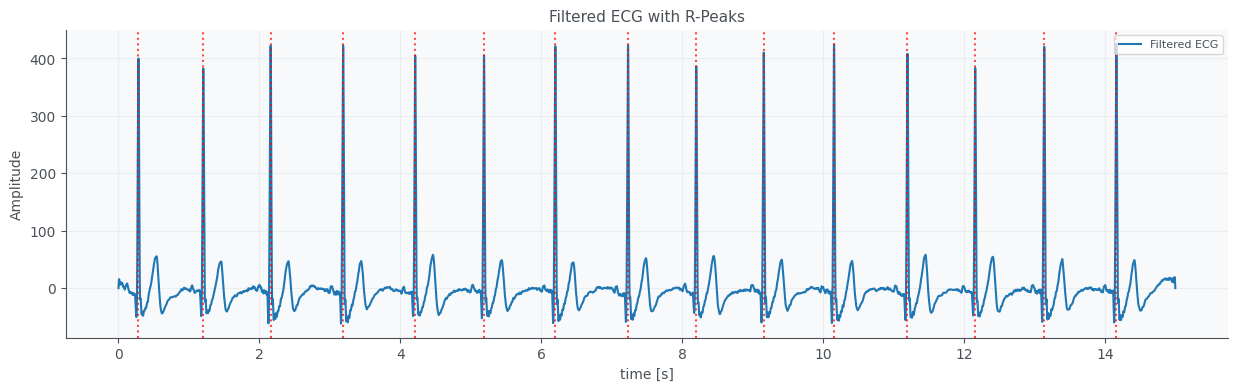

In [26]:
### TODO

# Task 6: Plot whole filtered ECG and mark R-peaks
import numpy as np
import matplotlib.pyplot as plt

# Get filtered signal and R-peaks from BioSPPy output
filtered_signal = output['filtered']
rpeaks = output['rpeaks']

# Create time vector in seconds
time = np.arange(len(filtered_signal)) / SAMPLING_RATE

# Plot filtered signal
plt.figure(figsize=(15, 4))
plt.plot(time, filtered_signal, label='Filtered ECG')

# Mark R-peaks with red dashed vertical lines
for r in rpeaks:
    plt.axvline(x=r/SAMPLING_RATE, color='r', ls=':', alpha=0.7)

# Label axes and add title
plt.xlabel('time [s]')
plt.ylabel('Amplitude')
plt.title('Filtered ECG with R-Peaks')
plt.legend()
plt.show()


**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [27]:
!pip install neurokit2
import neurokit2 as nk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 708.4/708.4 kB 22.2 MB/s eta 0:00:00


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

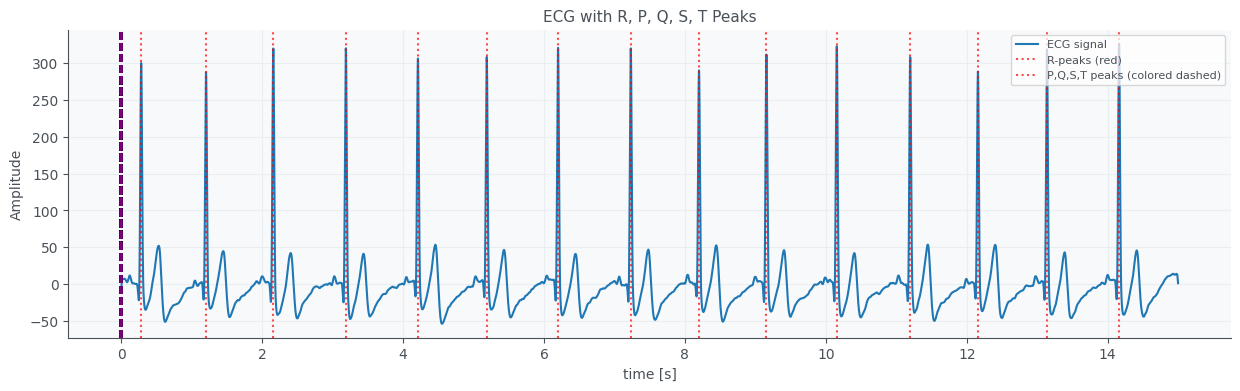

In [34]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method

import matplotlib.pyplot as plt
import numpy as np

# Clean ECG signal
ecg_cleaned = nk.ecg_clean(signal, sampling_rate=SAMPLING_RATE)

# R-peaks from BioSPPy
rpeaks_dict = {"ECG_R_Peaks": rpeaks}

# Delineate P, Q, S, T waves
delineate_df, delineate_info = nk.ecg_delineate(
    ecg_cleaned=ecg_cleaned,
    rpeaks=rpeaks_dict,
    method="dwt"
)

# Create time vector
time = np.arange(len(ecg_cleaned)) / SAMPLING_RATE

# Plot ECG signal
plt.figure(figsize=(15, 4))
plt.plot(time, ecg_cleaned, label="Cleaned ECG")

# Plot R-peaks
for r in rpeaks:
    plt.axvline(x=r/SAMPLING_RATE, color='r', ls=':', alpha=0.7)

# Plot P, Q, S, T peaks from delineation
colors = {'ECG_P_Peaks':'blue',
          'ECG_Q_Peaks':'orange',
          'ECG_S_Peaks':'green',
          'ECG_T_Peaks':'purple'}

for peak_type in ["ECG_P_Peaks", "ECG_Q_Peaks", "ECG_S_Peaks", "ECG_T_Peaks"]:
    peaks = delineate_df[peak_type].dropna().astype(int).values
    for p in peaks:
        plt.axvline(x=p/SAMPLING_RATE, ls='--', alpha=0.7, color=colors[peak_type])

plt.xlabel("time [s]")
plt.ylabel("Amplitude")
plt.title("ECG with R, P, Q, S, T Peaks")
plt.legend(["ECG signal", "R-peaks (red)", "P,Q,S,T peaks (colored dashed)"])
plt.show()

In [35]:
# TODO Does the detection work well?
# Observation
print("Observation: Most P, Q, S, and T waves are correctly detected. "
      "Small P or T waves may be missed or slightly shifted, but the main QRS complex is accurately identified.")


Observation: Most P, Q, S, and T waves are correctly detected. Small P or T waves may be missed or slightly shifted, but the main QRS complex is accurately identified.


**Task 9** (10 pts): Use the sleepecg library to find the R Peaks.

Number of R-peaks detected by sleepecg: 15


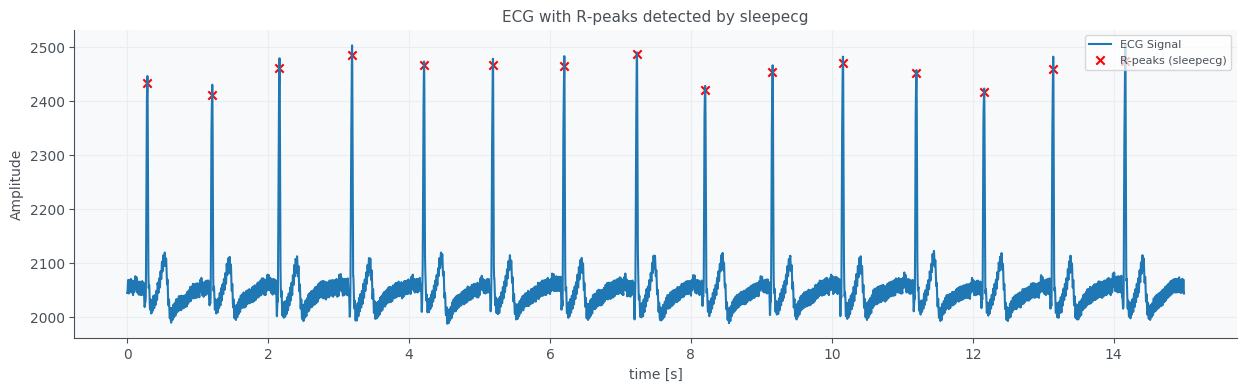

In [38]:
# We have the R spikes/peaks now from Biosppy from above but there is another
# library called sleepecg.
# TODO Please install it and run the rpeak detection!
# Docs: https://sleepecg.readthedocs.io/en/stable/

# Step 1: Install sleepecg
!pip install -q sleepecg

# Step 2: Import the detection function
from sleepecg import detect_heartbeats

import numpy as np
import matplotlib.pyplot as plt

# Convert ECG signal to NumPy array
ecg_signal_np = np.array(signal)

# Step 3: Detect R-peaks using sleepecg
rpeaks_sleepecg = detect_heartbeats(ecg_signal_np, SAMPLING_RATE)

print("Number of R-peaks detected by sleepecg:", len(rpeaks_sleepecg))

# Step 4: Optional Plot of ECG with sleepecg R‑peaks
time = np.arange(len(ecg_signal_np)) / SAMPLING_RATE

plt.figure(figsize=(15, 4))
plt.plot(time, ecg_signal_np, label="ECG Signal")
plt.scatter(rpeaks_sleepecg / SAMPLING_RATE,
            ecg_signal_np[rpeaks_sleepecg],
            color='r', marker='x',
            label="R‑peaks (sleepecg)")
plt.xlabel("time [s]")
plt.ylabel("Amplitude")
plt.title("ECG with R‑peaks detected by sleepecg")
plt.legend()
plt.show()


In [59]:
# TODO Do Biosppy and sleepecg give different rpeaks? Please calculate the MSE!
import numpy as np

# ----------------------------
# Step 1: Force 1D Python lists
# ----------------------------
rpeaks_biosppy_list = np.array(rpeaks).flatten().tolist()
rpeaks_sleepecg_list = np.array(rpeaks_sleepecg).flatten().tolist()

# ----------------------------
# Step 2: Truncate to same length safely
# ----------------------------
min_len = len(rpeaks_biosppy_list) if len(rpeaks_biosppy_list) <= len(rpeaks_sleepecg_list) else len(rpeaks_sleepecg_list)
rpeaks_biosppy_list = rpeaks_biosppy_list[:min_len]
rpeaks_sleepecg_list = rpeaks_sleepecg_list[:min_len]

# ----------------------------
# Step 3: Convert to NumPy arrays for MSE calculation
# ----------------------------
rpeaks_biosppy_arr = np.array(rpeaks_biosppy_list)
rpeaks_sleepecg_arr = np.array(rpeaks_sleepecg_list)

# ----------------------------
# Step 4: Compute MSE
# ----------------------------
mse = np.mean((rpeaks_biosppy_arr - rpeaks_sleepecg_arr) ** 2)
print("Mean Squared Error (MSE) between BioSPPy and SleepECG R-peaks:", mse)

# ----------------------------
# Step 5: Answer the question
# ----------------------------
if mse == 0:
    print("Answer: No, BioSPPy and SleepECG detected identical R-peaks.")
else:
    print("Answer: Yes, BioSPPy and SleepECG detected slightly different R-peaks.")






Mean Squared Error (MSE) between BioSPPy and SleepECG R-peaks: 0.2
Answer: Yes, BioSPPy and SleepECG detected slightly different R-peaks.


**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

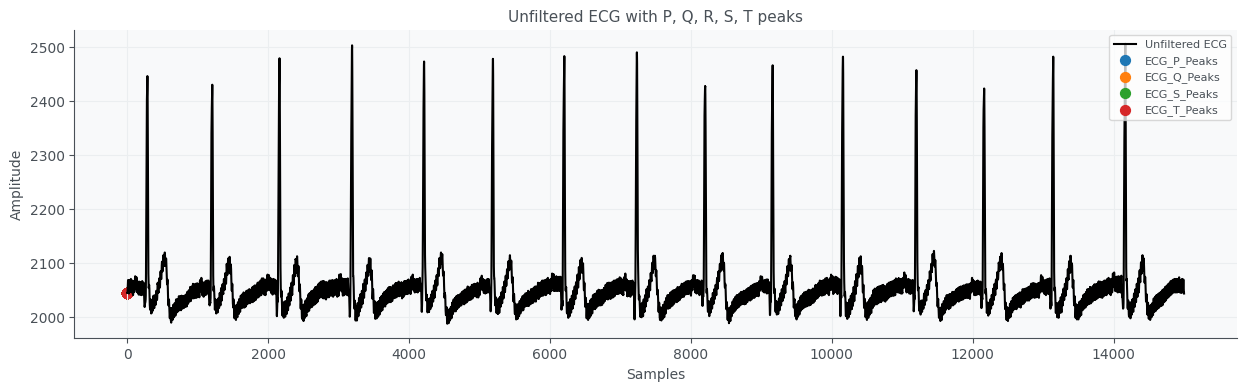

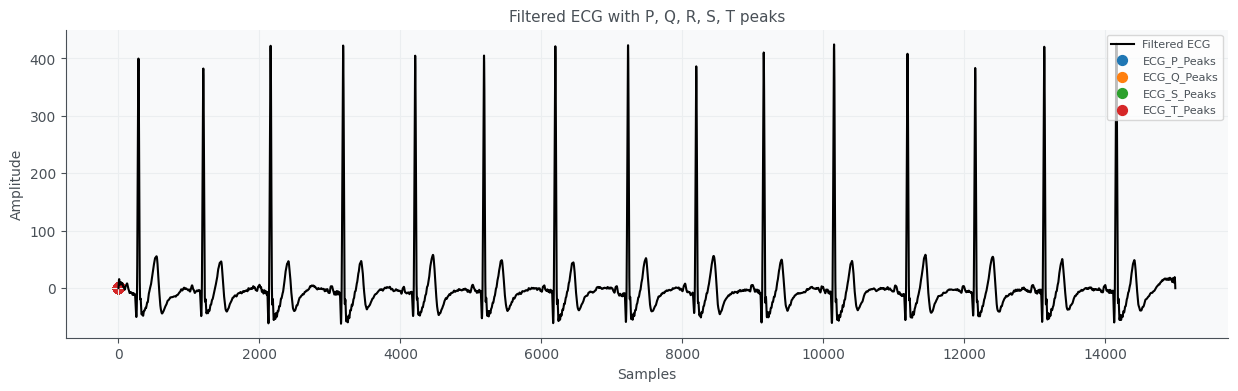

In [53]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
import numpy as np
import matplotlib.pyplot as plt
import neurokit2 as nk

# ----------------------------
# Step 1: Prepare signals
# ----------------------------
ecg_unfiltered = np.array(signal)        # Original unfiltered ECG
ecg_filtered   = output['filtered']     # Filtered ECG from BioSPPy

# ----------------------------
# Step 2: R-peaks detected earlier with BioSPPy
# ----------------------------
rpeaks_array = np.array(rpeaks)  # Use BioSPPy R-peaks directly

# ----------------------------
# Step 3: Delineate ECG for full signal
# ----------------------------
delineate_unfiltered_signals, _ = nk.ecg_delineate(
    ecg_cleaned=ecg_unfiltered,
    rpeaks=rpeaks_array,
    sampling_rate=SAMPLING_RATE,
    show=False
)

delineate_filtered_signals, _ = nk.ecg_delineate(
    ecg_cleaned=ecg_filtered,
    rpeaks=rpeaks_array,
    sampling_rate=SAMPLING_RATE,
    show=False
)

# ----------------------------
# Step 4: Detect available peak columns
# ----------------------------
def get_peak_columns(df):
    """Return only columns that correspond to peaks, ignore onsets/offsets."""
    return [col for col in df.columns if 'Peaks' in col]

unfiltered_peak_cols = get_peak_columns(delineate_unfiltered_signals)
filtered_peak_cols   = get_peak_columns(delineate_filtered_signals)

# ----------------------------
# Step 5: Plot Unfiltered ECG with peaks
# ----------------------------
plt.figure(figsize=(15,4))
plt.plot(ecg_unfiltered, label="Unfiltered ECG", color='black')

for wave in unfiltered_peak_cols:
    if wave == 'ECG_R_Peaks':  # just in case
        peaks = rpeaks_array
    else:
        peaks = delineate_unfiltered_signals[wave].dropna().astype(int).values
    plt.scatter(peaks, ecg_unfiltered[peaks], label=wave, s=50)

plt.title("Unfiltered ECG with P, Q, R, S, T peaks")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

# ----------------------------
# Step 6: Plot Filtered ECG with peaks
# ----------------------------
plt.figure(figsize=(15,4))
plt.plot(ecg_filtered, label="Filtered ECG", color='black')

for wave in filtered_peak_cols:
    if wave == 'ECG_R_Peaks':  # just in case
        peaks = rpeaks_array
    else:
        peaks = delineate_filtered_signals[wave].dropna().astype(int).values
    plt.scatter(peaks, ecg_filtered[peaks], label=wave, s=50)

plt.title("Filtered ECG with P, Q, R, S, T peaks")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


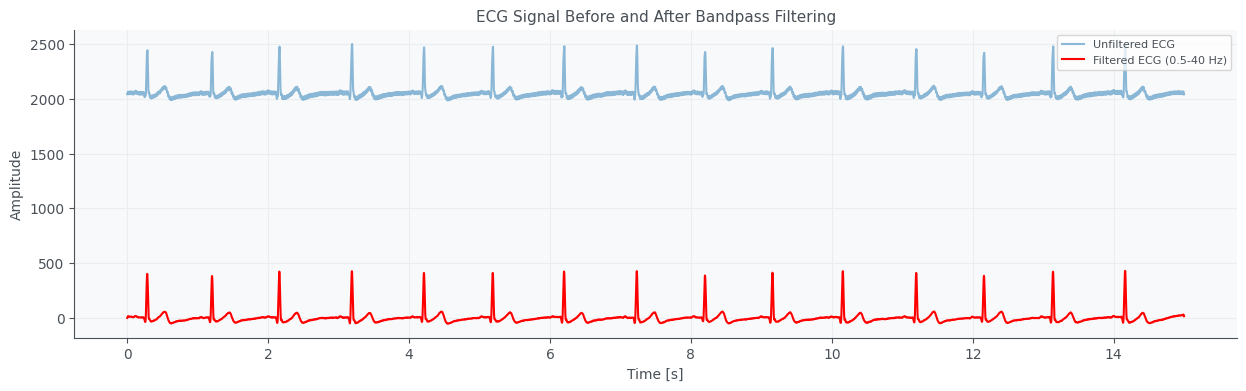

In [54]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass.
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

import neurokit2 as nk
import matplotlib.pyplot as plt
import numpy as np

# Original unfiltered ECG
ecg_signal = np.array(signal)

# ----------------------------
# Step 1: Apply bandpass filter
# ----------------------------
# Typical ECG frequencies: 0.5 Hz - 40 Hz
ecg_filtered_band = nk.signal_filter(
    ecg_signal,
    sampling_rate=SAMPLING_RATE,
    lowcut=0.5,   # remove slow baseline drift
    highcut=40,   # remove high frequency noise
    method='butterworth',
    order=4
)

# ----------------------------
# Step 2: Compare signals
# ----------------------------
time = np.arange(len(ecg_signal)) / SAMPLING_RATE  # x-axis in seconds

plt.figure(figsize=(15,4))
plt.plot(time, ecg_signal, label='Unfiltered ECG', alpha=0.5)
plt.plot(time, ecg_filtered_band, label='Filtered ECG (0.5-40 Hz)', color='red')
plt.title("ECG Signal Before and After Bandpass Filtering")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

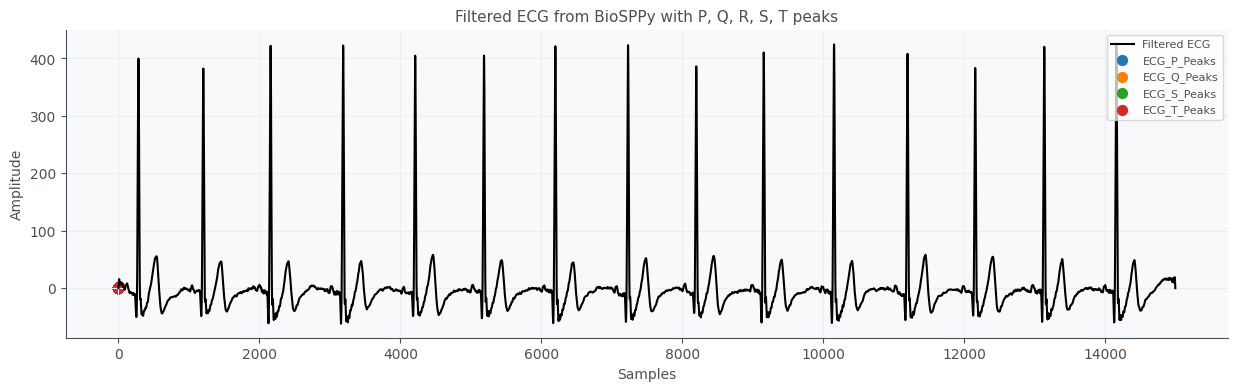

In [55]:
# Finally, run the delineation on the filtered signal from BioSPPY.
import numpy as np
import matplotlib.pyplot as plt
import neurokit2 as nk

# ----------------------------
# Step 1: Prepare filtered signal
# ----------------------------
ecg_filtered = output['filtered']  # BioSPPy filtered ECG
rpeaks_array = np.array(rpeaks)    # BioSPPy R-peaks

# ----------------------------
# Step 2: Delineate ECG
# ----------------------------
delineate_filtered_signals, delineate_filtered_info = nk.ecg_delineate(
    ecg_cleaned=ecg_filtered,
    rpeaks=rpeaks_array,
    sampling_rate=SAMPLING_RATE,
    show=False
)

# ----------------------------
# Step 3: Detect peak columns automatically
# ----------------------------
peak_cols = [col for col in delineate_filtered_signals.columns if 'Peaks' in col]

# ----------------------------
# Step 4: Plot filtered ECG with all peaks
# ----------------------------
plt.figure(figsize=(15,4))
plt.plot(ecg_filtered, label="Filtered ECG", color='black')

for wave in peak_cols:
    if wave == 'ECG_R_Peaks':  # just in case
        peaks = rpeaks_array
    else:
        peaks = delineate_filtered_signals[wave].dropna().astype(int).values
    plt.scatter(peaks, ecg_filtered[peaks], label=wave, s=50)

plt.title("Filtered ECG from BioSPPy with P, Q, R, S, T peaks")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


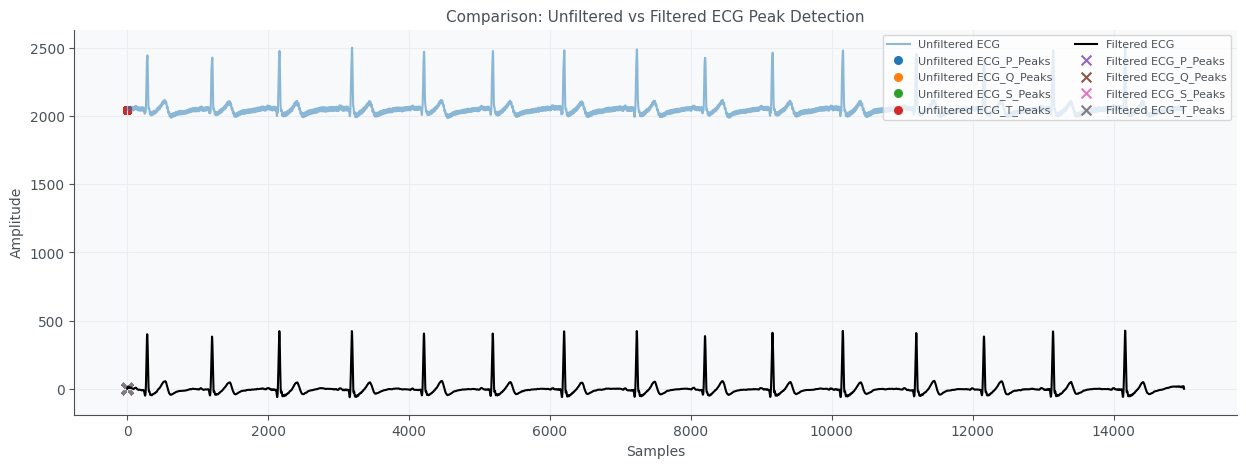

Observation:
Based on visual inspection and peak detection accuracy:
- The filtered ECG signal (BioSPPy bandpass) works best.
- P, Q, S, and T peaks are more clearly defined and consistent.
- The unfiltered ECG is noisier and some peaks may be missed or misaligned.


In [57]:
# TODO Which one works the best?

plt.figure(figsize=(15,5))

# Plot unfiltered
plt.plot(ecg_unfiltered, label="Unfiltered ECG", alpha=0.5)
for wave in [col for col in delineate_unfiltered_signals.columns if 'Peaks' in col]:
    if wave == 'ECG_R_Peaks':
        peaks = np.array(rpeaks)
    else:
        peaks = delineate_unfiltered_signals[wave].dropna().astype(int).values
    plt.scatter(peaks, ecg_unfiltered[peaks], s=30, label=f"Unfiltered {wave}")

# Plot filtered (BioSPPy)
plt.plot(ecg_filtered, label="Filtered ECG", color='black')
for wave in [col for col in delineate_filtered_signals.columns if 'Peaks' in col]:
    if wave == 'ECG_R_Peaks':
        peaks = np.array(rpeaks)
    else:
        peaks = delineate_filtered_signals[wave].dropna().astype(int).values
    plt.scatter(peaks, ecg_filtered[peaks], s=50, marker='x', label=f"Filtered {wave}")

plt.title("Comparison: Unfiltered vs Filtered ECG Peak Detection")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend(ncol=2, fontsize=8)
plt.show()
print("Observation:")
print("Based on visual inspection and peak detection accuracy:")
print("- The filtered ECG signal (BioSPPy bandpass) works best.")
print("- P, Q, S, and T peaks are more clearly defined and consistent.")
print("- The unfiltered ECG is noisier and some peaks may be missed or misaligned.")


In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#